# **Modelo de Ising com Numba**

In [51]:
## IMPORTS ##
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import numba


from numpy.random import random as npr
from numba import jit 
from numpy.random import default_rng

In [57]:
## PARAMETROS ##
# seeds para os rng
rd.seed(42)
np.random.seed(42)
rng = default_rng(seed=42)

L = 16 # L = tamanho da rede
L2 = L**2
# TMAX = tempo de simulação
TMAX = 100000

# s = matriz da rede 
s = np.array(rd.choices([-1,1], k=L2), dtype=np.float32)

# mag = magnitude 
mag = np.sum(s)/L2

medidas = np.zeros(TMAX, dtype=np.float32)
medidas2 = np.zeros(TMAX, dtype=np.float32)



# # TEMP = array com as temperaturas 
TEMP = np.array([2.269], dtype=np.float32)

In [58]:
## INICIANDO ##

# viz = matriz de vizinhos
@jit(nopython=True)
def init_viz(L2):
    viz = np.zeros((L2,4),dtype=numba.int64)
    for sitio in range(L2):
        n1 = ((sitio//L -1 +L2)%L)*L + sitio%L
        n2 = ((sitio//L)%L)*L+(sitio+1+L)%L
        n3 = ((sitio//L +1 +L2)%L)*L +sitio%L
        n4 = ((sitio//L)%L)*L+(sitio-1+L)%L
    
        viz[sitio][0] = n1
        viz[sitio][1] = n2
        viz[sitio][2] = n3
        viz[sitio][3] = n4
    return viz

In [59]:
## DINÂMICA ##

# função da dinâmica de MC
@jit(nopython=True)
def dinamica(s, medidas):
    for temp in TEMP:
        mag = np.sum(s)/L2 # definimos novamente a mag
        viz = init_viz(L2)  # iniciamos os vizinhos
        for t in range(TMAX):
            # rotina da dinamica
            for i in range(L2):
                sitio = np.random.randint(L2) # vou escolher um sitio aleatorio
                deltae = 2*s[sitio]*(s[viz[sitio,0]] + s[viz[sitio,1]] +s[viz[sitio,2]]+s[viz[sitio,3]])
                prob = np.exp(-deltae/temp)
                rfloat1 = npr(1)[0]  # num aleatorio [0,1) | npr() = numpy.random.random()
                if rfloat1 < prob: # if para flipar o sitio
                    s[sitio] = s[sitio]*(-1)
                    mag = mag + 2*s[sitio] # ajustamo a mag
            medidas[t] = mag # salvando o valor da mag do passo t 

In [66]:
dinamica(s, medidas)

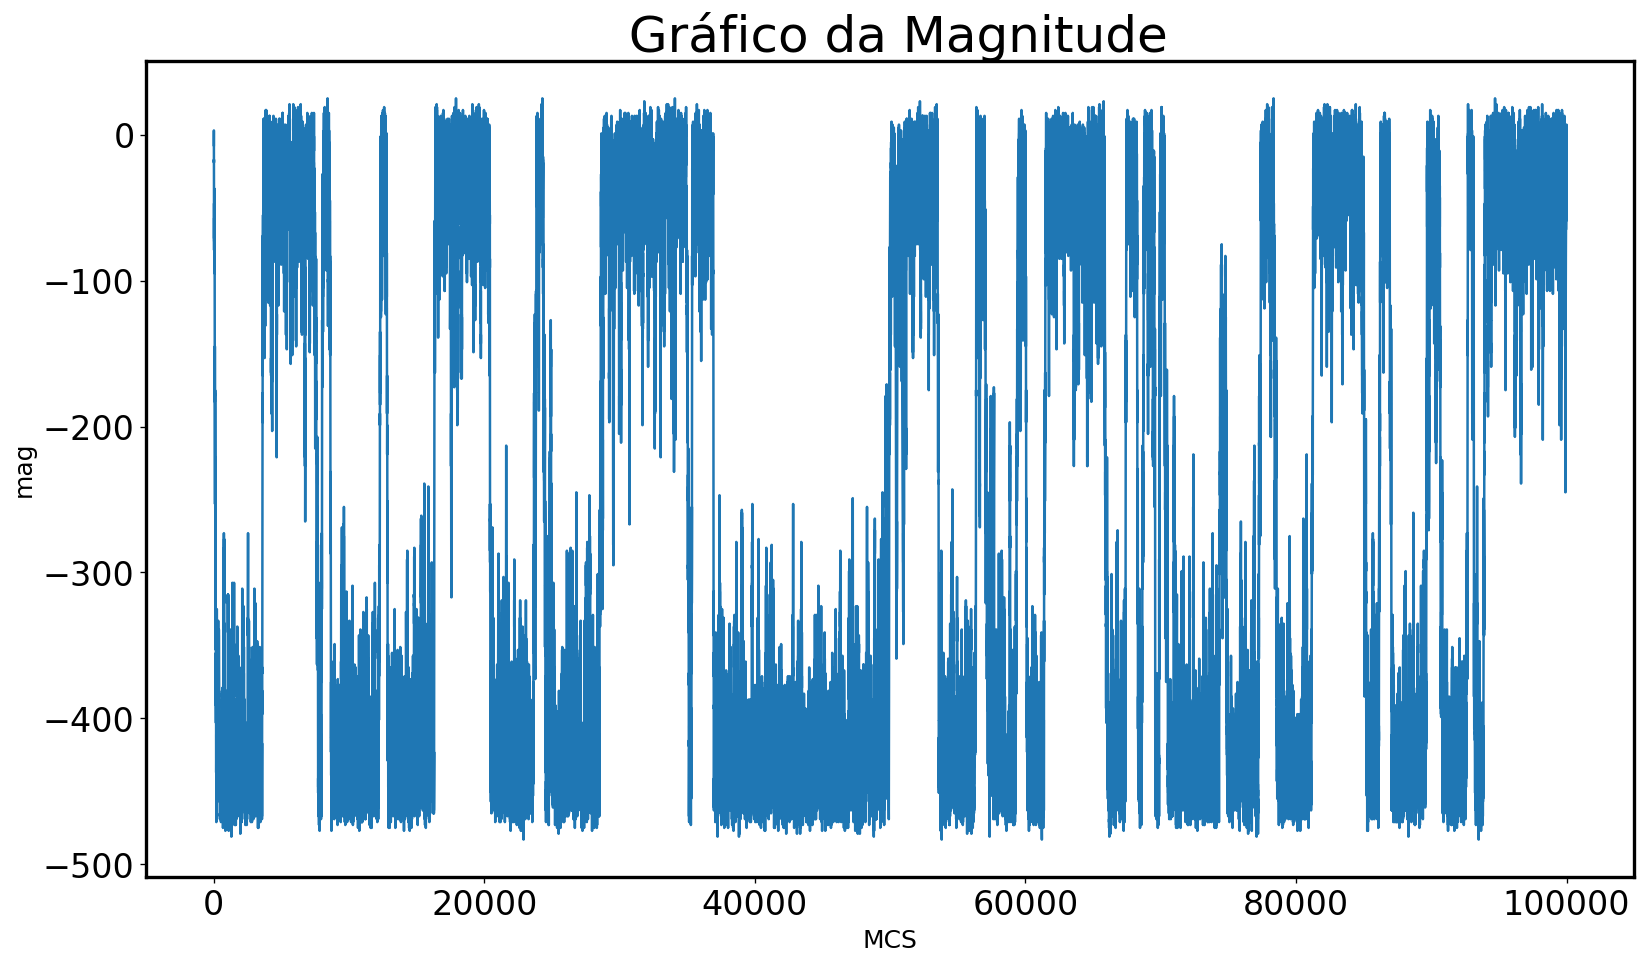

In [67]:
## PLOT ##
#configs
#-------------------------- PLT CONFIGS ----------------------------------------
fig, ax = plt.subplots(figsize=(16,9), dpi=120)
plt.title(' Gráfico da Magnitude', fontsize=30)
plt.xlabel('MCS', fontsize=15)
plt.ylabel('mag', fontsize=15)

#---------------------- CHART CONFIGURATION ------------------------------------
ax.tick_params(axis="x", labelsize=20)
ax.tick_params(axis="y", labelsize=20)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)




plt.plot(medidas, label='mag')
plt.show()